In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


## Reading the data

In [3]:
data=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory data Analysis

### Basic information about Data

In [4]:
print('There are {} data points and {} features in the data'.format(data.shape[0],data.shape[1]))

There are 303 data points and 14 features in the data


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### checking for null values

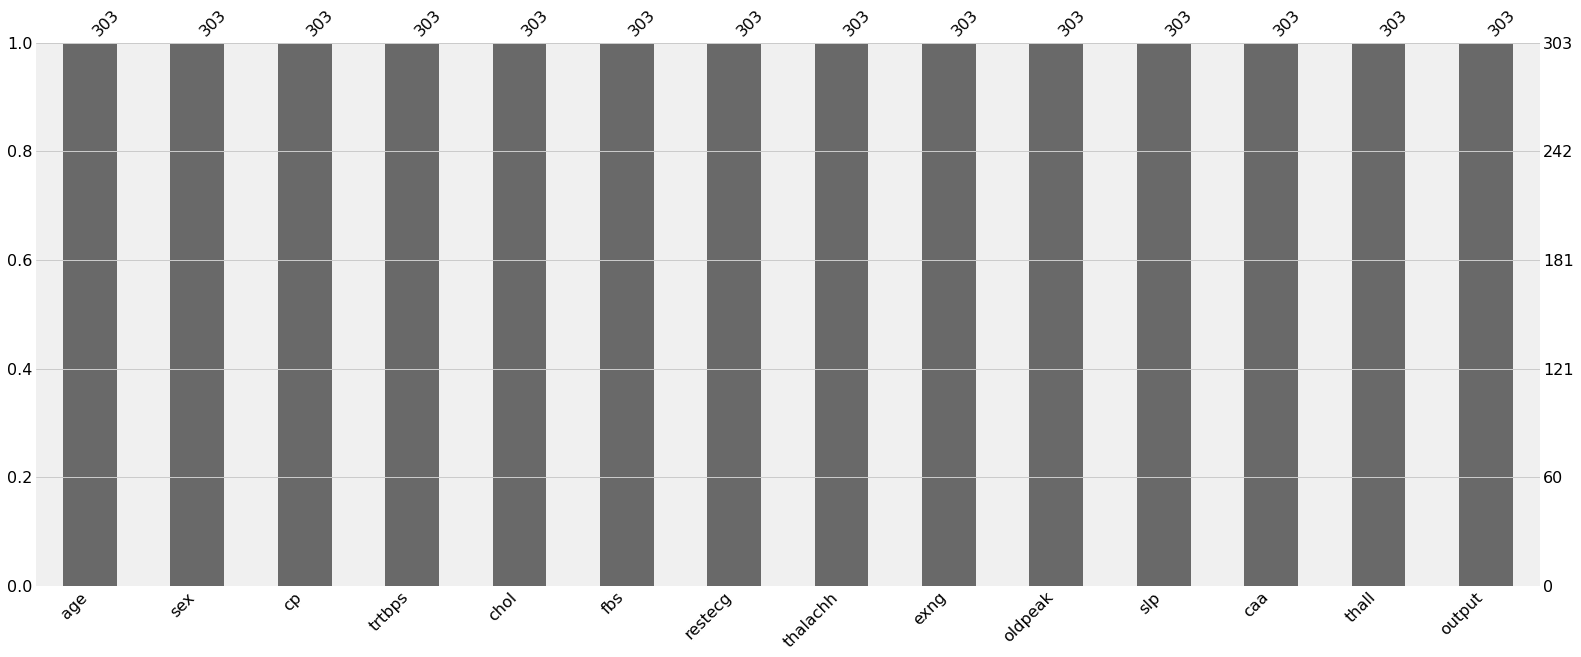

In [7]:

msno.bar(data)
plt.show()

<AxesSubplot:>

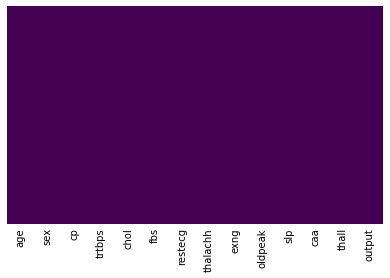

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no missing values present in the dataset

### Checking correlation

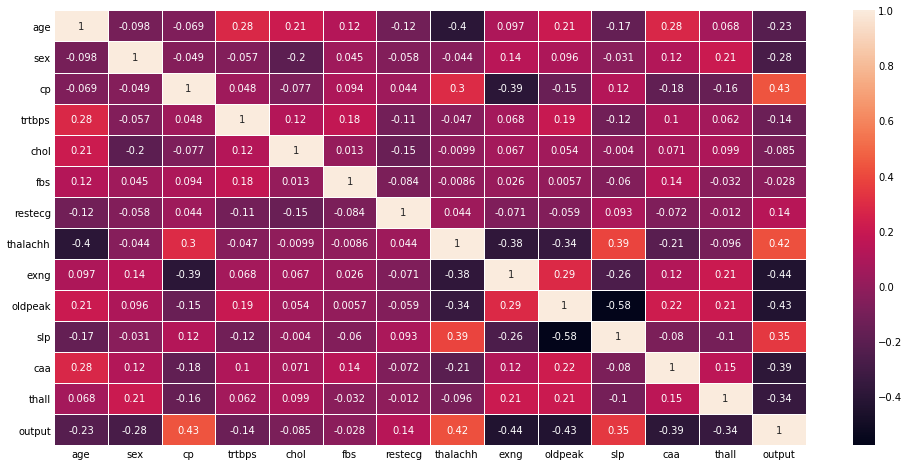

In [9]:
plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 1)
plt.show()

There are no correlated columns presebt in the data 

### Analysis of Features

### Age

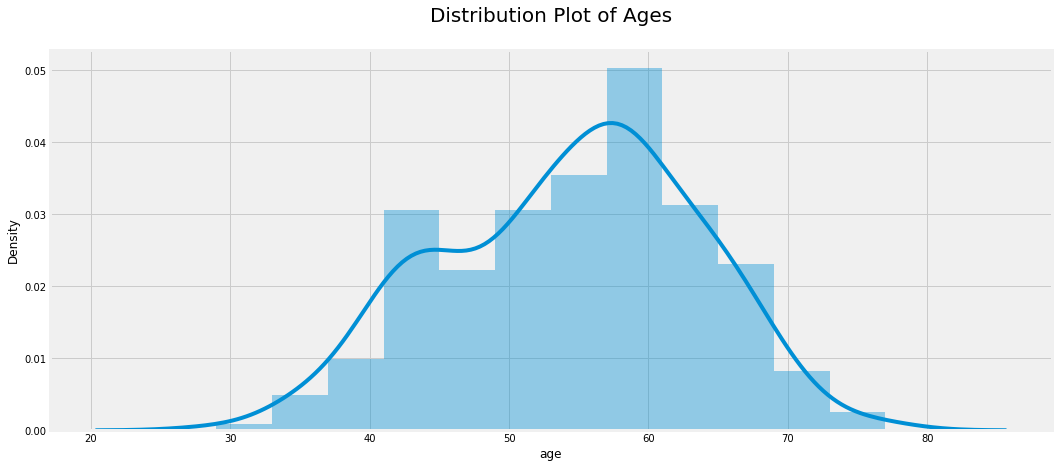

In [10]:
plt.figure(figsize = (16, 7))
sns.distplot(data['age'])
plt.title('Distribution Plot of Ages\n', fontsize =  20)
plt.show()

In [11]:
Age_18_25 = data.age[(data.age >= 18) & (data.age <= 25)]
Age_26_35 = data.age[(data.age >= 26) & (data.age <= 35)]
Age_36_45 = data.age[(data.age >= 36) & (data.age <= 45)]
Age_46_55 = data.age[(data.age >= 46) & (data.age <= 55)]
Age_56_65 = data.age[(data.age >= 56) & (data.age <= 65)]
Age_66_75 = data.age[(data.age >= 66) & (data.age <= 75)]
Age_75above = data.age[data.age >= 76]
x_Age = [ '18-25','26-35', '36-45', '46-55', '56-65','66-75','75+']
y_Age = [len(Age_18_25.values), len(Age_26_35.values), len(Age_36_45.values), len(Age_46_55.values), len(Age_56_65.values),
         len(Age_66_75.values), len(Age_75above.values)]

px.bar(data_frame = data, x = x_Age, y = y_Age, color = x_Age, template = 'plotly_dark',
        labels={
                     'x': "Age",
                     'y': "Number",
                     'color':'Age group'
                     
                 },
       title = 'Number of patients per Age group')

We can see the cases are more of age group from 56 to 65

### Gender

In [12]:

px.bar(data_frame = data, x = list(data.sex.value_counts().keys()), y = list(data.sex.value_counts()), 
       color = list(data.sex.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "Gender",
                     'y': "Number",
                     'color':'Gender group'
                     
                 },
       title = 'Number of patients per Gender group')


Assigning labels for one hot encoding

In [13]:
# since we don't know 0 is male or female and vice versa we are assigning with the same label 
data['sex'] = data['sex'].map({0:"0_gender", 1: "1_gender"}) 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1_gender,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0_gender,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1_gender,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0_gender,0,120,354,0,1,163,1,0.6,2,0,2,1


### cp
Chest Pain type chest pain type

In [14]:

px.bar(data_frame = data, x = list(data.cp.value_counts().keys()), y = list(data.cp.value_counts()), 
       color = list(data.cp.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "Chest Pain intnsity",
                     'y': "Count",
                     'color':'Chest Pain intnsity'
                     
                 },
       title = 'Number of patients per Chest Pain intnsity')


In [15]:

cp_0_1 = data.cp[(data.cp == 0) & (data.output == 1)]
cp_0_0 = data.cp[(data.cp == 0) & (data.output == 0)]
cp_1_1 = data.cp[(data.cp == 1) & (data.output == 1)]
cp_1_0 = data.cp[(data.cp == 1) & (data.output == 0)]
cp_2_1 = data.cp[(data.cp == 2) & (data.output == 1)]
cp_2_0 = data.cp[(data.cp == 2) & (data.output == 0)]
cp_3_1 = data.cp[(data.cp == 3) & (data.output == 1)]
cp_3_0 = data.cp[(data.cp == 3) & (data.output == 0)]

y_cp_1 = [len(cp_0_1.values), len(cp_1_1.values), len(cp_2_1.values), len(cp_3_1.values)]
y_cp_0 = [len(cp_0_0.values), len(cp_1_0.values), len(cp_2_0.values),len(cp_3_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1,2,3],
    y=y_cp_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1,2,3],
    y=y_cp_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Though Chest pain is represented as numeric data but it is categorical in nature. We can convert the data to categorical to get dummies. LabelEncoding will not work here as we can see that there is not such relation among the categories that resembles an ordinal relationship.

In [16]:
data['cp'] = data['cp'].map({0:"Intensity_0", 1: "Intensity_1", 2: 'Intensity_2',3:'Intensity_3'}) 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,Intensity_3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1_gender,Intensity_2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0_gender,Intensity_1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1_gender,Intensity_1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0_gender,Intensity_0,120,354,0,1,163,1,0.6,2,0,2,1


### trtbps
resting blood pressure (in mm Hg)

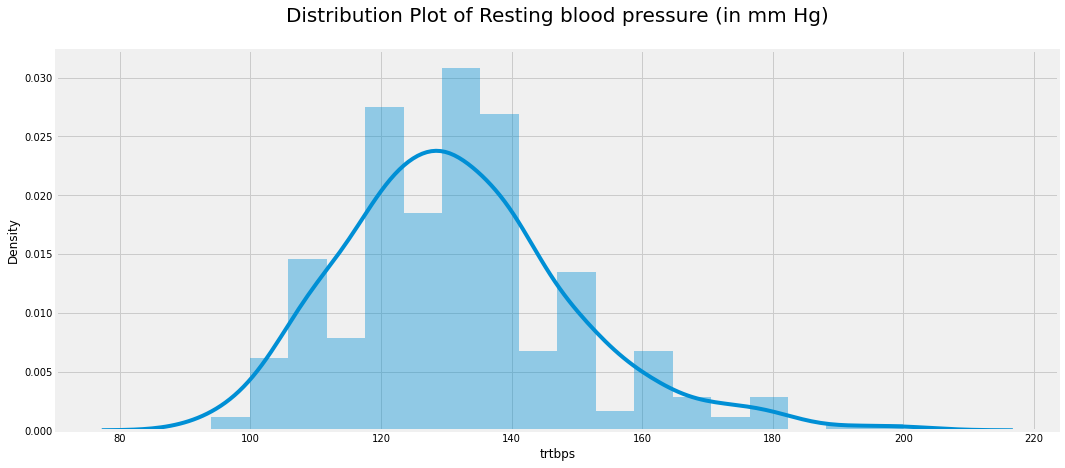

In [17]:
plt.figure(figsize = (16, 7))
sns.distplot(data['trtbps'])
plt.title('Distribution Plot of Resting blood pressure (in mm Hg)\n', fontsize =  20)
plt.show()

### chol
cholestoral in mg/dl fetched via BMI sensor

In [18]:
px.box(x = 'trtbps', data_frame = data, template = 'plotly_dark')

### chol
cholestoral in mg/dl fetched via BMI sensor

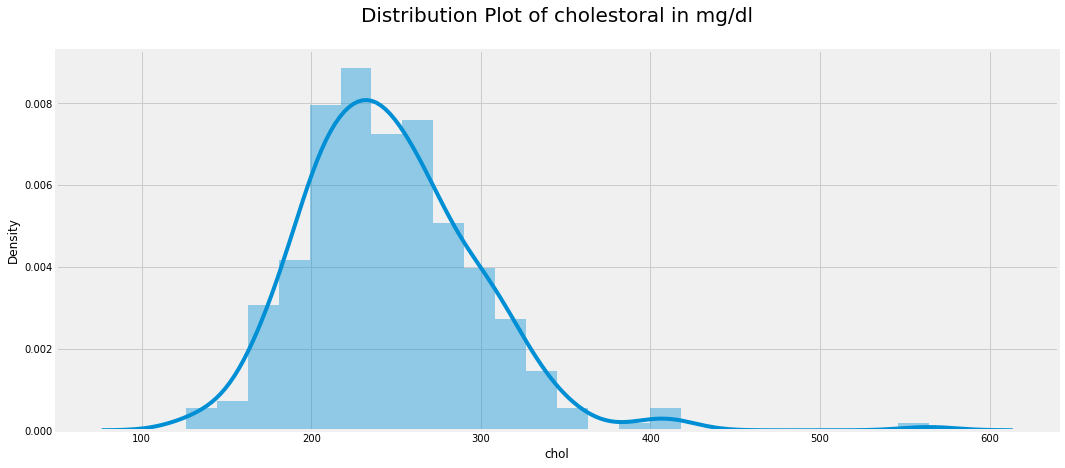

In [19]:
plt.figure(figsize = (16, 7))
sns.distplot(data['chol'])
plt.title('Distribution Plot of cholestoral in mg/dl\n', fontsize =  20)
plt.show()

In [20]:
px.box(x = 'chol', data_frame = data, template = 'plotly_dark')

lets see trtbps and chol has similar outliers 

In [21]:
 data.chol[data.trtbps >= 171]

8      199
101    270
110    325
203    274
223    288
241    249
248    283
260    228
266    327
Name: chol, dtype: int64

the values of trtbps outliers are well in range of cholestrol level

### fbs
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [22]:

px.bar(data_frame = data, x = list(data.fbs.value_counts().keys()), y = list(data.fbs.value_counts()), 
       color = list(data.fbs.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "fasting blood sugar > 120 mg/dl",
                     'y': "Count",
                     'color':'fasting blood sugar > 120 mg/dl'
                     
                 },
       title = 'Number of patients having fasting blood sugar > 120 mg/dl')


In [23]:
import plotly.graph_objects as go

fbs_0_1 = data.fbs[(data.fbs == 0) & (data.output == 1)]
fbs_0_0 = data.fbs[(data.fbs == 0) & (data.output == 0)]
fbs_1_1 = data.fbs[(data.fbs == 1) & (data.output == 1)]
fbs_1_0 = data.fbs[(data.fbs == 1) & (data.output == 0)]

y_fbs_1 = [len(fbs_0_1.values), len(fbs_1_1.values)]
y_fbs_0 = [len(fbs_0_0.values), len(fbs_1_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1],
    y=y_fbs_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1],
    y=y_fbs_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Variation in sugar level is not the sole cause of a heart attack

### restecg
resting electrocardiographic results

In [24]:

px.bar(data_frame = data, x = list(data.restecg.value_counts().keys()), y = list(data.restecg.value_counts()), 
       color = list(data.restecg.value_counts().keys()),
        labels={
                     'x': "resting electrocardiographic results",
                     'y': "Count",
                     'color':'resting electrocardiographic results'
                     
                 },
       title = 'Number of patients per resting electrocardiographic results')


In [25]:
import plotly.graph_objects as go

restecg_0_1 = data.restecg[(data.restecg == 0) & (data.output == 1)]
restecg_0_0 = data.restecg[(data.restecg == 0) & (data.output == 0)]
restecg_1_1 = data.restecg[(data.restecg == 1) & (data.output == 1)]
restecg_1_0 = data.restecg[(data.restecg == 1) & (data.output == 0)]
restecg_2_1 = data.restecg[(data.restecg == 2) & (data.output == 1)]
restecg_2_0 = data.restecg[(data.restecg == 2) & (data.output == 0)]

y_restecg_1 = [len(restecg_0_1.values), len(restecg_1_1.values), len(restecg_2_1.values)]
y_restecg_0 = [len(restecg_0_0.values), len(restecg_1_0.values), len(restecg_2_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1,2],
    y=y_restecg_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1,2],
    y=y_restecg_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [26]:
data['restecg'] = data['restecg'].map({0:"restecg_0", 1: "restecg_1", 2: 'restecg_2'}) 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,Intensity_3,145,233,1,restecg_0,150,0,2.3,0,0,1,1
1,37,1_gender,Intensity_2,130,250,0,restecg_1,187,0,3.5,0,0,2,1
2,41,0_gender,Intensity_1,130,204,0,restecg_0,172,0,1.4,2,0,2,1
3,56,1_gender,Intensity_1,120,236,0,restecg_1,178,0,0.8,2,0,2,1
4,57,0_gender,Intensity_0,120,354,0,restecg_1,163,1,0.6,2,0,2,1


### thalachh
maximum heart rate achieved

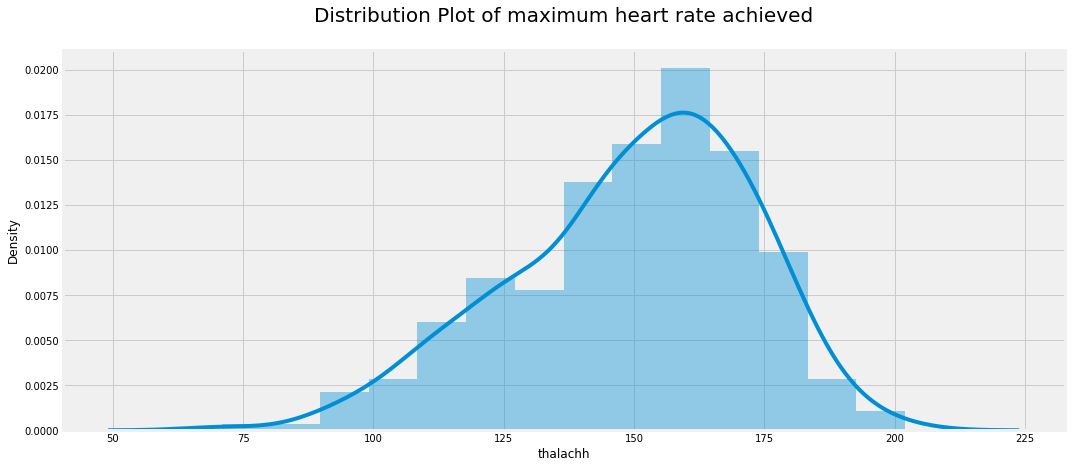

In [27]:
plt.figure(figsize = (16, 7))
sns.distplot(data['thalachh'])
plt.title('Distribution Plot of maximum heart rate achieved\n', fontsize =  20)
plt.show()

In [28]:
thalachh_50_85 = data.thalachh[(data.thalachh >= 50) & (data.thalachh <= 85)]
thalachh_86_110 = data.thalachh[(data.thalachh >= 86) & (data.thalachh <= 110)]
thalachh_111_135 = data.thalachh[(data.thalachh >= 111) & (data.thalachh <= 135)]
thalachh_136_160 = data.thalachh[(data.thalachh >= 136) & (data.thalachh <= 160)]
thalachh_161_185 = data.thalachh[(data.thalachh >= 161) & (data.thalachh <= 185)]
thalachh_185above = data.thalachh[data.thalachh >= 186]
x_thalachh = [ '50-85','86-110', '111-135', '136-160', '161-185','185+']
y_thalachh = [len(thalachh_50_85.values), len(thalachh_86_110.values), len(thalachh_111_135.values), len(thalachh_136_160.values)
         , len(thalachh_161_185.values), len(thalachh_185above.values)]

px.bar(data_frame = data, x = x_thalachh, y = y_thalachh, color = x_thalachh, template = 'plotly_dark',
        labels={
                     'x': "maximum heart rate achieved",
                     'y': "Count",
                     'color':'maximum heart rate achieved'
                     
                 })

In [29]:
px.bar(data_frame = data, x = 'age', y = 'thalachh', color = 'age', template = 'plotly_dark',
       labels={
                     'x': "Age",
                     'y': "maximum heart beat",
                     'color':'Age'},
       title = 'Age to maximum heart beat(sum)')

In [30]:
px.box(x = 'thalachh', data_frame = data, template = 'plotly_dark')

### exng
exercise induced angina (1 = yes; 0 = no)

In [31]:

px.bar(data_frame = data, x = list(data.exng.value_counts().keys()), y = list(data.exng.value_counts()), 
       color = list(data.exng.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "exercise induced angina",
                     'y': "Count",
                     'color':'exercise induced angina'
                     
                 },
       title = 'Number of patients having exercise induced angina')


In [32]:
import plotly.graph_objects as go

exng_0_1 = data.exng[(data.exng == 0) & (data.output == 1)]
exng_0_0 = data.exng[(data.exng == 0) & (data.output == 0)]
exng_1_1 = data.exng[(data.exng == 1) & (data.output == 1)]
exng_1_0 = data.exng[(data.exng == 1) & (data.output == 0)]

y_exng_1 = [len(exng_0_1.values), len(exng_1_1.values)]
y_exng_0 = [len(exng_0_0.values), len(exng_1_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1],
    y=y_exng_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1],
    y=y_exng_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

We can see that not getting exercise induced angina may have a greater chance of heart attack

### oldpeak
Previous peak

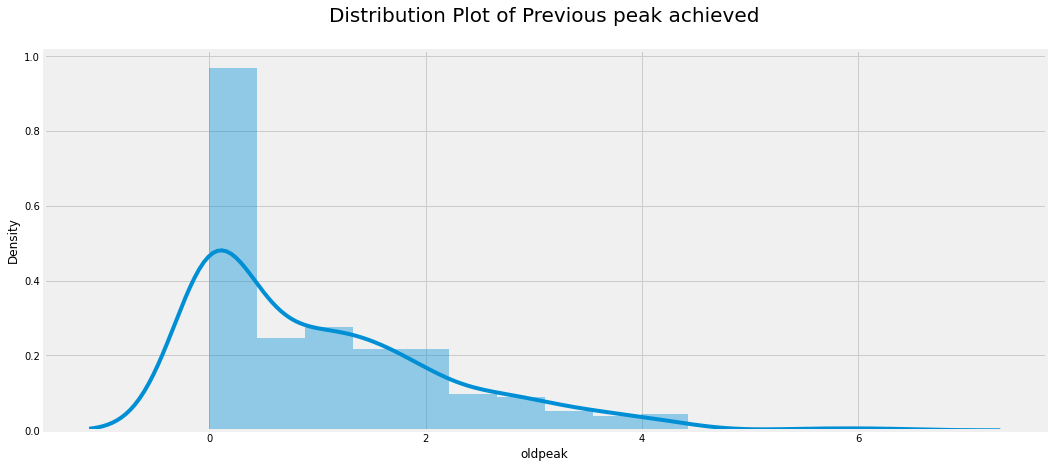

In [33]:
plt.figure(figsize = (16, 7))
sns.distplot(data['oldpeak'])
plt.title('Distribution Plot of Previous peak achieved\n', fontsize =  20)
plt.show()

In [34]:
px.box(x = 'oldpeak', data_frame = data, template = 'plotly_dark')

### slp

In [35]:

px.bar(data_frame = data, x = list(data.slp.value_counts().keys()), y = list(data.slp.value_counts()), 
       color = list(data.slp.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "slp",
                     'y': "Count",
                     'color':'slp'
                     
                 },
       title = 'slp plot')


In [36]:
import plotly.graph_objects as go

slp_0_1 = data.slp[(data.slp == 0) & (data.output == 1)]
slp_0_0 = data.slp[(data.slp == 0) & (data.output == 0)]
slp_1_1 = data.slp[(data.slp == 1) & (data.output == 1)]
slp_1_0 = data.slp[(data.slp == 1) & (data.output == 0)]
slp_2_1 = data.slp[(data.slp == 2) & (data.output == 1)]
slp_2_0 = data.slp[(data.slp == 2) & (data.output == 0)]

y_slp_1 = [len(slp_0_1.values), len(slp_1_1.values), len(slp_2_1.values)]
y_slp_0 = [len(slp_0_0.values), len(slp_1_0.values), len(slp_2_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1,2],
    y=y_slp_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1,2],
    y=y_slp_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [37]:
data['slp'] = data['slp'].map({0:"slp_0", 1: "slp_1", 2: 'slp_2'}) 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,Intensity_3,145,233,1,restecg_0,150,0,2.3,slp_0,0,1,1
1,37,1_gender,Intensity_2,130,250,0,restecg_1,187,0,3.5,slp_0,0,2,1
2,41,0_gender,Intensity_1,130,204,0,restecg_0,172,0,1.4,slp_2,0,2,1
3,56,1_gender,Intensity_1,120,236,0,restecg_1,178,0,0.8,slp_2,0,2,1
4,57,0_gender,Intensity_0,120,354,0,restecg_1,163,1,0.6,slp_2,0,2,1


### caa

In [38]:

px.bar(data_frame = data, x = list(data.caa.value_counts().keys()), y = list(data.caa.value_counts()), 
       color = list(data.caa.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "caa",
                     'y': "Count",
                     'color':'caa'
                     
                 },
       title = 'caa plot')


In [39]:
import plotly.graph_objects as go

caa_0_1 = data.caa[(data.caa == 0) & (data.output == 1)]
caa_0_0 = data.caa[(data.caa == 0) & (data.output == 0)]
caa_1_1 = data.caa[(data.caa == 1) & (data.output == 1)]
caa_1_0 = data.caa[(data.caa == 1) & (data.output == 0)]
caa_2_1 = data.caa[(data.caa == 2) & (data.output == 1)]
caa_2_0 = data.caa[(data.caa == 2) & (data.output == 0)]

caa_3_1 = data.caa[(data.caa == 3) & (data.output == 1)]
caa_3_0 = data.caa[(data.caa == 3) & (data.output == 0)]

caa_4_1 = data.caa[(data.caa == 4) & (data.output == 1)]
caa_4_0 = data.caa[(data.caa == 4) & (data.output == 0)]

y_caa_1 = [len(caa_0_1.values), len(caa_1_1.values), len(caa_2_1.values), len(caa_3_1.values), len(caa_4_1.values)]
y_caa_0 = [len(caa_0_0.values), len(caa_1_0.values), len(caa_2_0.values), len(caa_3_0.values), len(caa_4_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1,2,3,4],
    y=y_caa_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1,2,3,4],
    y=y_caa_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [40]:
data['caa'] = data['caa'].map({0:"caa_0", 1: "caa_1", 2: 'caa_2', 3: 'caa_3', 4: 'caa_4'}) 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,Intensity_3,145,233,1,restecg_0,150,0,2.3,slp_0,caa_0,1,1
1,37,1_gender,Intensity_2,130,250,0,restecg_1,187,0,3.5,slp_0,caa_0,2,1
2,41,0_gender,Intensity_1,130,204,0,restecg_0,172,0,1.4,slp_2,caa_0,2,1
3,56,1_gender,Intensity_1,120,236,0,restecg_1,178,0,0.8,slp_2,caa_0,2,1
4,57,0_gender,Intensity_0,120,354,0,restecg_1,163,1,0.6,slp_2,caa_0,2,1


### thall

In [41]:

px.bar(data_frame = data, x = list(data.thall.value_counts().keys()), y = list(data.thall.value_counts()), 
       color = list(data.thall.value_counts().keys()), template = 'plotly_dark',
        labels={
                     'x': "thall",
                     'y': "Count",
                     'color':'thall'
                     
                 },
       title = 'caa plot',barmode='group')


In [42]:
import plotly.graph_objects as go

thall_0_1 = data.thall[(data.thall == 0) & (data.output == 1)]
thall_0_0 = data.thall[(data.thall == 0) & (data.output == 0)]
thall_1_1 = data.thall[(data.thall == 1) & (data.output == 1)]
thall_1_0 = data.thall[(data.thall == 1) & (data.output == 0)]
thall_2_1 = data.thall[(data.thall == 2) & (data.output == 1)]
thall_2_0 = data.thall[(data.thall == 2) & (data.output == 0)]
thall_3_1 = data.thall[(data.thall == 3) & (data.output == 1)]
thall_3_0 = data.thall[(data.thall == 3) & (data.output == 0)]

y_thall_1 = [len(thall_0_1.values), len(thall_1_1.values), len(thall_2_1.values), len(thall_3_1.values)]
y_thall_0 = [len(thall_0_0.values), len(thall_1_0.values), len(thall_2_0.values), len(thall_3_0.values)]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[0,1,2,3],
    y=y_thall_1,
    name='Heart Attack',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=[0,1,2,3],
    y=y_thall_0,
    name='Safe',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [43]:
data['thall'] = data['thall'].map({0:"thall_0", 1: "thall_1", 2: 'thall_2', 3: 'thall_3'}) 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,Intensity_3,145,233,1,restecg_0,150,0,2.3,slp_0,caa_0,thall_1,1
1,37,1_gender,Intensity_2,130,250,0,restecg_1,187,0,3.5,slp_0,caa_0,thall_2,1
2,41,0_gender,Intensity_1,130,204,0,restecg_0,172,0,1.4,slp_2,caa_0,thall_2,1
3,56,1_gender,Intensity_1,120,236,0,restecg_1,178,0,0.8,slp_2,caa_0,thall_2,1
4,57,0_gender,Intensity_0,120,354,0,restecg_1,163,1,0.6,slp_2,caa_0,thall_2,1


### Feature engineering

In [44]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1_gender,Intensity_3,145,233,1,restecg_0,150,0,2.3,slp_0,caa_0,thall_1,1
1,37,1_gender,Intensity_2,130,250,0,restecg_1,187,0,3.5,slp_0,caa_0,thall_2,1
2,41,0_gender,Intensity_1,130,204,0,restecg_0,172,0,1.4,slp_2,caa_0,thall_2,1
3,56,1_gender,Intensity_1,120,236,0,restecg_1,178,0,0.8,slp_2,caa_0,thall_2,1
4,57,0_gender,Intensity_0,120,354,0,restecg_1,163,1,0.6,slp_2,caa_0,thall_2,1


### One hot encoding

In [45]:
data=pd.get_dummies(data)
data.head()

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,output,sex_0_gender,sex_1_gender,...,slp_slp_2,caa_caa_0,caa_caa_1,caa_caa_2,caa_caa_3,caa_caa_4,thall_thall_0,thall_thall_1,thall_thall_2,thall_thall_3
0,63,145,233,1,150,0,2.3,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,0,187,0,3.5,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,0,172,0,1.4,1,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,0,178,0,0.8,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,0,163,1,0.6,1,1,0,...,1,1,0,0,0,0,0,0,1,0


In [46]:
X= data.drop(['output'],axis=1)
Y= data["output"]

In [47]:
from sklearn.model_selection import train_test_split
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.85,random_state=42)


print("training data shape:- {} labels {} ".format(x_train.shape[0],x_train.shape[1]))
print("testing data shape:- {} labels {} ".format(x_test.shape[0],x_test.shape[1]))

training data shape:- 257 labels 28 
testing data shape:- 46 labels 28 


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import r2_score

xgb = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 8,
                    nthread= 5,
                    random_state= 0,
                    )
xgb.fit(x_train,y_train)

[17:51:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.99, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=5, nthread=5, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(xgb.score(x_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(xgb.score(x_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.95
Accuracy of XGBoost classifier on test set: 0.80


In [50]:
from sklearn import metrics

y_pred=xgb.predict(x_test)
print("Accuracy of XG Boost model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of XG Boost model is: 80.43478260869566


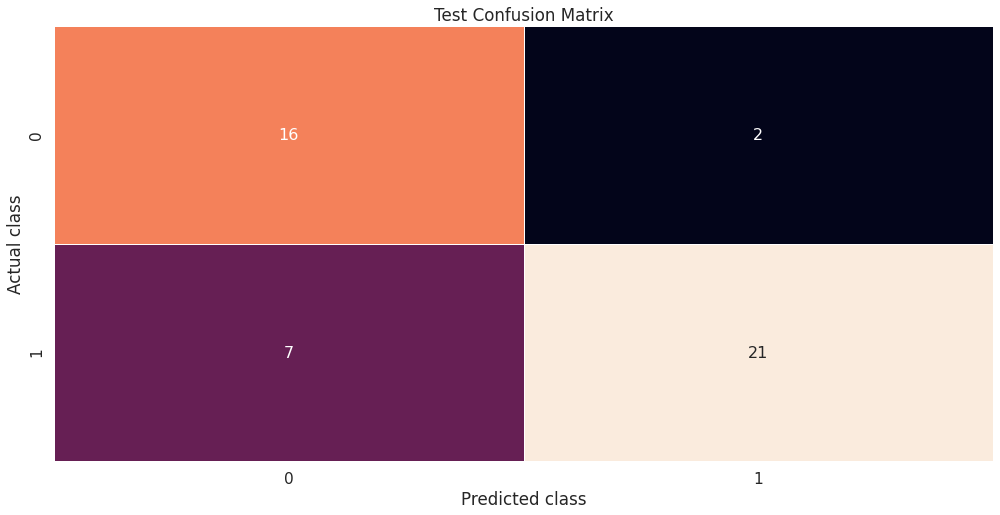

In [51]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('conf_test.png')
plt.show()

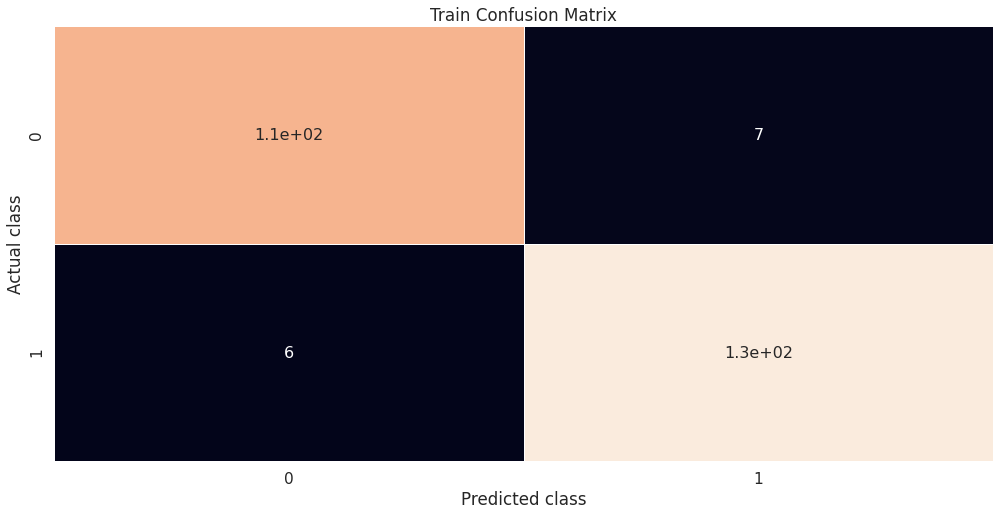

In [52]:
from sklearn.metrics import confusion_matrix
y_pred_t=xgb.predict(x_train)
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_t)
plt.figure(figsize = (15, 8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16},cbar=False, linewidths = 1) # font size
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("For testing data")
print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

print()

print("For training data")
y_pred_t=xgb.predict(x_train)
print('Precision: %.3f' % precision_score(y_train, y_pred_t,average='micro'))
print('Recall: %.3f' % recall_score(y_train, y_pred_t,average='micro'))
print('F1 Score: %.3f' % f1_score(y_train, y_pred_t,average='micro'))


For testing data
Precision: 0.804
Recall: 0.804
F1 Score: 0.804

For training data
Precision: 0.949
Recall: 0.949
F1 Score: 0.949


For fine tuning our main aim should be to reduce true negative